# OnSet_Detection

Supervisor: Peter Jancovic
Student: Yuxuan Yang 1976844

## Packages

In [1]:
from __future__ import print_function, division
import numpy as np
import madmom
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
from functools import partial

peak_picking = partial(madmom.features.onsets.peak_picking, threshold=1.25,
                       pre_max=1, post_max=5, pre_avg=15, post_avg=0)

In [3]:
audio_files = madmom.utils.search_files('D:\projectRESEARCH\CNN\Aut_Week8','.wav')
audio_files

['D:\\projectRESEARCH\\CNN\\Aut_Week8\\Study11.wav',
 'D:\\projectRESEARCH\\CNN\\Aut_Week8\\Study17.wav',
 'D:\\projectRESEARCH\\CNN\\Aut_Week8\\Study5.wav',
 'D:\\projectRESEARCH\\CNN\\Aut_Week8\\Study6.wav']

## Time Domain
Sample rate = number of samples / second

Frame = 1 sample from each channel (PCM)

Frame Size = Sample size * Channels

Frame Rate = frames / second.

In [4]:
signal = madmom.audio.Signal('D:\projectRESEARCH\CNN\Aut_Week8\Study5.wav')
signal

Signal([ 0,  0,  0, ...,  0,  2, -3], dtype=int16)

Text(0, 0.5, 'amplitude')

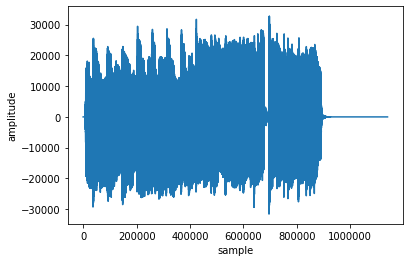

In [5]:
plt.plot(signal)
plt.xlabel('sample')
plt.ylabel('amplitude')

## frequency domain
Using Short-time Fourier Transform(STFT)
A parameter of frame size of 1024 samples with overlaped 512 is chosen. For an alternative method directly using madmom.audio.Sectrogram to signal, will using a default parametrisation of 2048 samples and frame rate of 100 frames per second(fps).

86.1328125

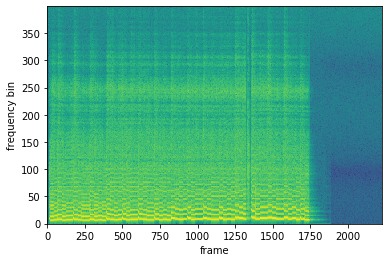

In [6]:
fs = madmom.audio.signal.FramedSignal(signal, frame_size =1024, hop_size =512)
stft = madmom.audio.stft.STFT(fs)
spec = madmom.audio.spectrogram.Spectrogram(stft)
plt.imshow(np.log(spec).T[:400], origin='lower', aspect='auto')
plt.xlabel('frame')
plt.ylabel('frequency bin')
fs.frame_rate

### Filtering

Text(0, 0.5, 'frequency bin')

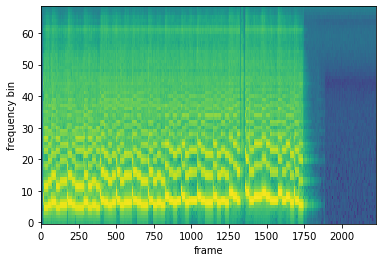

In [7]:
filt_spec = madmom.audio.FilteredSpectrogram(spec)
plt.imshow(np.log(filt_spec).T, origin='lower', aspect='auto')
plt.xlabel('frame')
plt.ylabel('frequency bin')

## LogFBE

Text(0, 0.5, 'frequency bin')

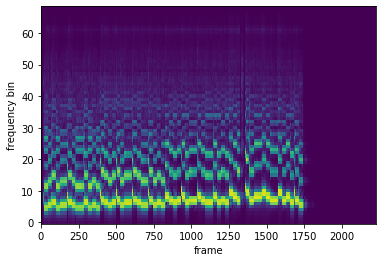

In [8]:
log_filt_spec = madmom.audio.LogarithmicSpectrogram(filt_spec)
plt.imshow(log_filt_spec.T, origin='lower', aspect='auto')
plt.xlabel('frame')
plt.ylabel('frequency bin')

## energy difference

Text(0, 0.5, 'frequency bin')

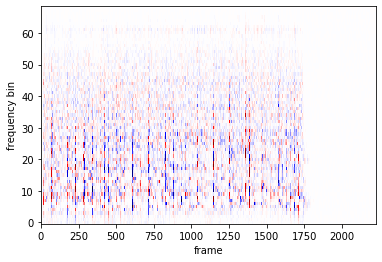

In [9]:
log_filt_spec_diff = madmom.audio.SpectrogramDifference(log_filt_spec)
plt.imshow(log_filt_spec_diff.T, origin='lower', aspect='auto', cmap='seismic', vmin=-1, vmax=1)
plt.xlabel('frame')
plt.ylabel('frequency bin')

## Sum of difference
Spectral Flux: Spectral Flux is defined as the sum of all these positive differences.

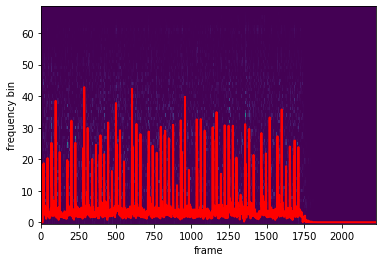

In [10]:
log_filt_spec_flux = madmom.audio.SpectrogramDifference(log_filt_spec, positive_diffs=True)
spectral_flux = np.sum(log_filt_spec_flux, axis=1)
plt.imshow(log_filt_spec_flux.T, origin='lower', aspect='auto')
plt.xlabel('frame')
plt.ylabel('frequency bin')
plt.plot(spectral_flux  * 3, 'r', linewidth=2)

## Onset Plot
 A standard way is to compute a running average and use all peaks above this running average and a certain threshold as onsets.

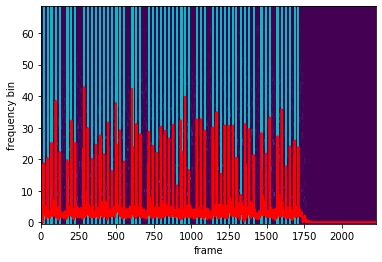

In [11]:
onsets = madmom.features.onsets.peak_picking(spectral_flux, threshold=1.25, pre_max=1,
                                             post_max=5, pre_avg=15, post_avg=0)
onsets = np.array(onsets, dtype=np.float)
onsets /= fs.frame_rate
plt.imshow(log_filt_spec_flux.T, origin='lower', aspect='auto')
plt.xlabel('frame')
plt.ylabel('frequency bin')
for o in onsets:
    plt.axvline(o * fs.frame_rate, color='c', linestyle='-', linewidth=2)
plt.plot(spectral_flux * 3, 'r', linewidth=2)

In [12]:
onsets

array([ 0.22058957,  0.510839  ,  0.80108844,  0.84752834,  1.13777778,
        1.45124717,  2.03174603,  2.05496599,  2.3568254 ,  2.65868481,
        3.34367347,  3.61070295,  3.95900227,  4.2492517 ,  4.59755102,
        4.87619048,  5.18965986,  5.4799093 ,  5.79337868,  5.83981859,
        6.10684807,  6.42031746,  7.03564626,  7.08208617,  7.3723356 ,
        7.68580499,  8.32435374,  8.62621315,  8.93968254,  9.25315193,
        9.58984127,  9.8800907 , 10.20517007, 10.50702948, 10.79727891,
       10.8553288 , 11.12235828, 11.42421769, 12.02793651, 12.06276644,
       12.3414059 , 12.64326531, 13.2585941 , 13.30503401, 13.56045351,
       13.89714286, 14.18739229, 14.4892517 , 14.53569161, 14.81433107,
       15.09297052, 15.41804989, 15.44126984, 15.76634921, 15.78956916,
       16.07981859, 16.41650794, 17.02022676, 17.05505669, 17.36852608,
       17.65877551, 18.26249433, 18.30893424, 18.5875737 , 18.92426304,
       19.21451247, 19.58603175, 19.87628118])

In [13]:
import codecs

f = codecs.open('D:\projectRESEARCH\CNN\Aut_Week8\study5.txt',mode='r',encoding='utf-8')
line = f.readline()
annotation=[]
while line:
    a=line.split()
    b= a[1:2]
    annotation.append(b)
    line=f.readline()
f.close
annotation = list(map(list, zip(*annotation)))
annotation= np.asarray(annotation[0])
annotation = annotation.astype(np.float)
np.savetxt('study5_onset.onset',annotation,delimiter=',')

In [58]:
annotation

array([ 0.2206,  0.5457,  0.8359,  0.8969,  1.1755,  1.4832,  2.0608,
        2.1014,  2.4004,  2.6935,  3.2856,  3.3843,  3.6484,  3.9996,
        4.2841,  4.554 ,  4.6411,  4.9255,  5.2158,  5.5118,  5.8021,
        5.8746,  6.1272,  6.4522,  7.0385,  7.1053,  7.3927,  7.7177,
        8.2808,  8.3447,  8.6465,  8.9803,  9.2793,  9.5637,  9.6305,
        9.9178, 10.24  , 10.5302, 10.8176, 10.8756, 11.134 , 11.4532,
       12.0366, 12.0918, 12.3849, 12.681 , 13.2673, 13.3137, 13.5866,
       13.9175, 14.1961, 14.4951, 14.5386, 14.8346, 15.1336, 15.4239,
       15.7576, 15.8273, 16.103 , 16.4368, 17.026 , 17.087 , 17.3976,
       17.6878, 18.2683, 18.3176, 18.6282, 18.9562, 19.261 , 19.5367,
       19.6122, 19.9169])